In [2]:
Постройте в Python функцию **binom_analysis** (для всех расчетов используйте модуль *binom* из библиотеки *scipy.stats*)**.** 

В первую очередь необходимо создать вспомогательную функцию ***binom_coeff**.*

На вход она берет два параметра: ***n***  — количество экспериментов и ***p*** — вероятность успеха. 

Используя функцию *comb* из библиотеки *scipy.special*, рассчитывается ряд биномиальных коэффициентов для каждого k, пробегающего от 0 до n

На вход она берет:

- ***n*** — количество экспериментов,
- ***p*** — вероятность успеха,
- ***sample_size*** — размер выборки для построения выборочной функции плотности (имеет значение по умолчанию = 10 000).

Функция должна уметь:

1. Расчет среднего, дисперсии и стандартного отклонения биномиального распределения с заданными параметрами, сохранение этих величин во внутренние переменные и print этих показателей с расшифровками.
2. Расчет ряда кумулятивных вероятностей (функция распределения) для всех k, пробегающих от 0 до n (сохраните результат во внутреннюю переменную ***cdf***). Используйте функцию *binom.cdf*
3. Расчет ряда некумулятивных вероятностей (функция плотности вероятности) для всех k, пробегающих от 0 до n (сохраните результат во внутреннюю переменную ***pmf***). Используйте функцию *binom.pmf*
4. Создает датафрейм с четырьмя колонками: Х, cdf, pmf, coeff_binom. Ряд k, cdf и pmf заносится в этот датафрейм. Также туда заносится (в 4 колонку) ряд биномиальных коэффициентов, который рассчитывается с помощью функции ***binom_coeff.*** 
5. Отображение *barplot* (*seaborn*) функции распределения и функции плотности биномиального распределения, заданного параметрами-аргументами (*pmf* и *cdf* должны быть на отдельных графиках). Установить размер (figsize) на (20, 10). Сделать ротацию тиков на X-оси на 60 градусов.
6. Теперь воспользуемся, наконец, параметром ***sample_size***  (по умолчанию значение 10000).
    
     Задача - вывести выборочную функцию плотности биномиального распределения (эксперимент с определением ***k*** успехов среди ***n*** наблюдений повторяется ***sample_size***   раз). 
    
    Для создания рандомной выборки используйте функцию *rvs* из библиотеки *binom*. Постройте выборочную гистограмму функции плотности с помощью библиотеки *seaborn.*
    
    Попробуйте несколько вариантов значения параметра ***sample_size*** и посмотрите, как он влияет на форму гистограммы функции плотности.
    

### Как сдавать домашнюю работу

Добавьте в личном кабинете в виде вложения тетрадь Python. Формат тетради —  .ipynb.

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 26)

In [46]:
import statistics as st
from scipy.stats import uniform
from scipy.stats import binom
from scipy.special import comb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [38]:
def binom_coeff (n, p):
    k = np.arange (0, n+1)
    c = comb(n,k)
    return c 

In [73]:
def binom_analysis (n, p, sample_size = 100000):
    avg = n*p
    var = n*p*(1-p)
    std = np.sqrt(var)
    print ('Среднее:', avg)
    print ('Дисперсия:', var)
    print ('Стандартное отклонение:', std)
    
    k = np.arange (0, n+1)
    cdf = binom.cdf (k,n,p)
    pmf = binom.pmf (k,n,p)
    
    df = pd.DataFrame({'k':k})
    df['cdf'] = cdf
    df['pmf'] = pmf
    df['binom_coeff'] = binom_coeff (n, p)
    print(df.head())
    
    plt.figure(figsize = (20, 10))
    sns.barplot (x = 'k', y = 'cdf', data = df)
    plt.xticks(rotation = 60)
    plt.show()
    
    plt.figure(figsize = (20, 10))
    sns.barplot (x = 'k', y = 'pmf', data = df)
    plt.xticks(rotation = 60)
    plt.show()
    
    plt.figure(figsize = (20, 10))
    sns.histplot(data = pd.Series(binom.rvs(n, p, size = sample_size)))
    plt.show()

    
    
    return
    

Среднее: 50.0
Дисперсия: 25.0
Стандартное отклонение: 5.0
   k           cdf           pmf  binom_coeff
0  0  7.888609e-31  7.888609e-31          1.0
1  1  7.967495e-29  7.888609e-29        100.0
2  2  3.984536e-27  3.904861e-27       4950.0
3  3  1.315433e-25  1.275588e-25     161700.0
4  4  3.224844e-24  3.093301e-24    3921225.0


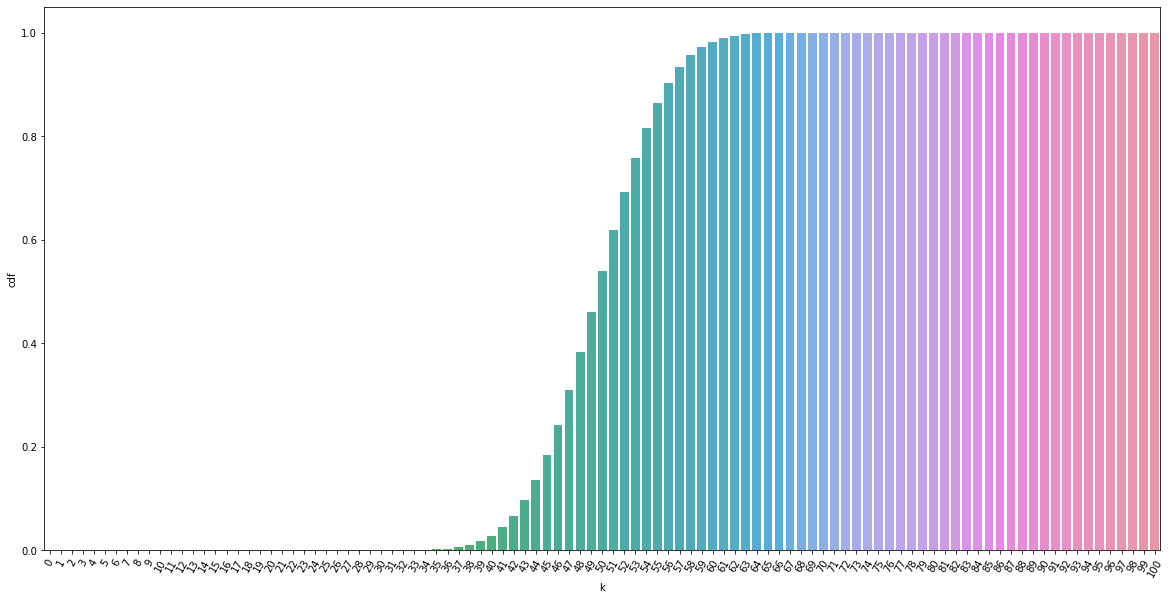

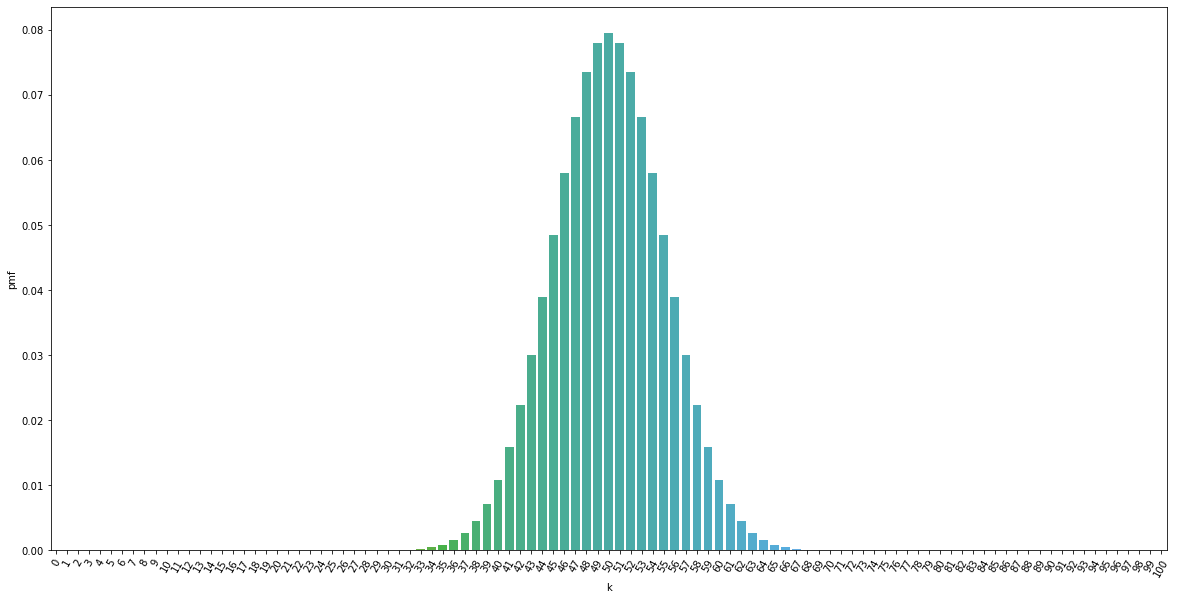

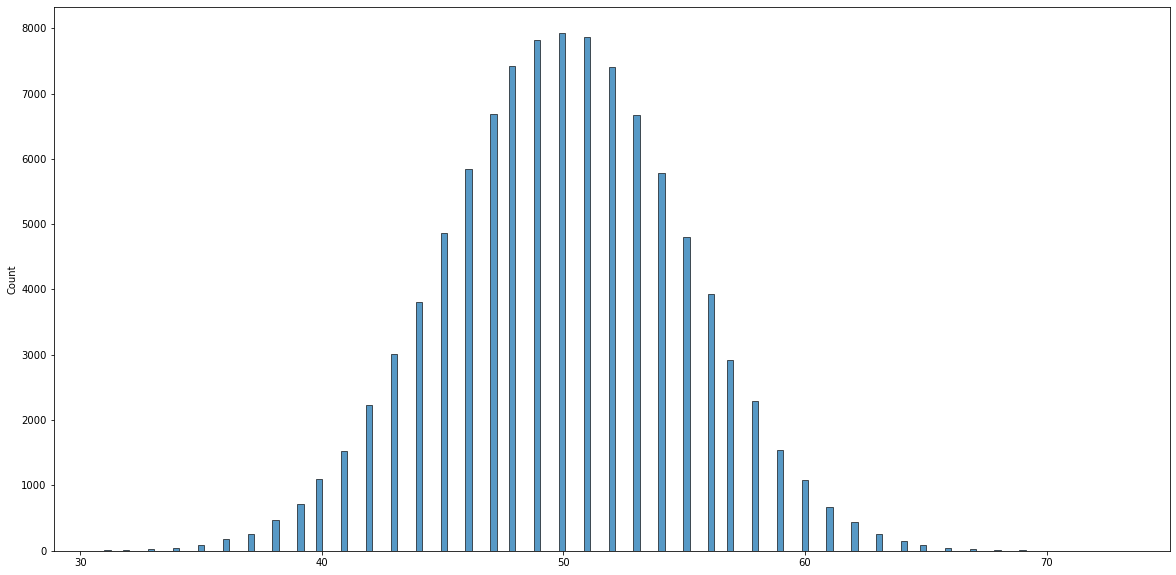

In [78]:
binom_analysis (100, 0.5)